# **Lab 03 - MALTO Machine Learning Workshop**
---
# Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, validation_curve, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

import warnings
from lab_utils import (
    summarize_metric,
    scoring,
    plot_residuals,
    plot_predicted_vs_actual,
)

warnings.filterwarnings("ignore")

# Set the style for plots
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("deep")

# Dictionary to store performance metrics
model_performances = []
random_state = 42

## 1. Introduction to Regression

Regression is a **supervised learning task** where the goal is to **predict a continuous value** based on input features. It's used in a wide range of domains like real estate, finance, and energy systems.

### 🔍 Key Concepts:
- **Target Variable**: What we want to predict (e.g., house price).
- **Features**: Inputs used for prediction (e.g., size, income, location).
- **Regression Function**: The mathematical relationship between features and target.

### 🧠 Common Applications:
- Predicting house prices
- Estimating energy consumption
- Forecasting revenue
- Predicting equipment failure (Remaining Useful Life)

---

### 🔄 Regression vs. Classification

| Aspect          | Regression                           | Classification                     |
|-----------------|--------------------------------------|-------------------------------------|
| Output          | Continuous (e.g., price)             | Categorical (e.g., spam/not spam)  |
| Goal            | Minimize prediction error            | Maximize correct classification     |
| Examples        | Predict temperature, sales           | Email filtering, image labeling     |
| Metrics         | MSE, MAE, R²                         | Accuracy, Precision, F1-score       |

<p align="center">
    <img src="docs/Regression_vs_Classification.avif" alt="Regression vs Classification" width="50%">
</p>


## 2. Loading and Inspecting the Dataset

In this lab, we will use the [**California Housing Dataset**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html), a classic regression dataset.

### 🎯 Target Variable:
- `MedHouseValue`: Median house value in a district, expressed in $100,000.

### 📊 Features:
- `MedInc`: Median income in block group.
- `HouseAge`: Median house age in block group.
- `AveRooms`: Average number of rooms per household.
- `AveBedrms`: Average number of bedrooms per household.
- `Population`: Block group population.
- `AveOccup`: Average number of household members.
- `Latitude`: Block group latitude.
- `Longitude`: Block group longitude.

We'll begin by **loading** the dataset, **exploring** its structure, and **visualizing** the distribution of the target variable.

In [2]:
california_housing = fetch_california_housing(as_frame=True)

In [3]:
type(california_housing)

sklearn.utils._bunch.Bunch

### Bunch Object Attributes

The `bunch` object is a dictionary-like object with the following attributes:

- `data`, which is a pandas object (since `as_frame=True`). Each row corresponds to 8 feature values.

- `target` value contains average house value in units of 100,000. This is also a pandas object (since `as_frame=True`).

- `feature_names` is an array of ordered feature names used in the dataset.

- `DESCR` contains a description of the dataset.

- `frame` contains a dataframe with data and target.

Each of these attributes can be accessed as `<bunch_object>.key`. In our case, we can access these features as follows:

- `california_housing.data` gives us access to contents of `data` key.

- `california_housing.target` gives us access to contents of `target` key.

- `california_housing.feature_names` gives us access to contents of `feature_names` key.

- `california_housing.DESCR` gives us access to contents of `DESCR` key.

- `california_housing.frame` gives us access to contents of `frame` key.


In [4]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Key Statistics

Note down the key statistics from this description:

- There are **20640 examples** in the dataset.

- There are **8 numerical attributes** per example.

- The target label is the median house value.

- There are **no missing values** in this dataset.


In [5]:
california_housing.data.shape

(20640, 8)

In [6]:
type(california_housing.data)

pandas.core.frame.DataFrame

In [7]:
california_housing.target.shape

(20640,)

In [8]:
type(california_housing.target)

pandas.core.series.Series

### Attributes and Their Description

Understanding the attributes and their descriptions is crucial for analyzing the dataset:

- MedInc - Median income in the block.

- HouseAge - Median house age in the block.

- AveRooms - Average number of rooms.

- AveBedrms - Average number of bedrooms.

- Population - Block population.

- AveOccupancy - Average house occupancy.

- Latitude - Latitude of the house block.

- Longitude - Longitude of the house block.

In [9]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [12]:
print("\nDataset Info:")
print(california_housing.frame.info())

print("\nDataset Description:")
print(california_housing.frame.describe())

print("\nFirst 5 rows of the dataset:")
print(california_housing.frame.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Dataset Description:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.00000

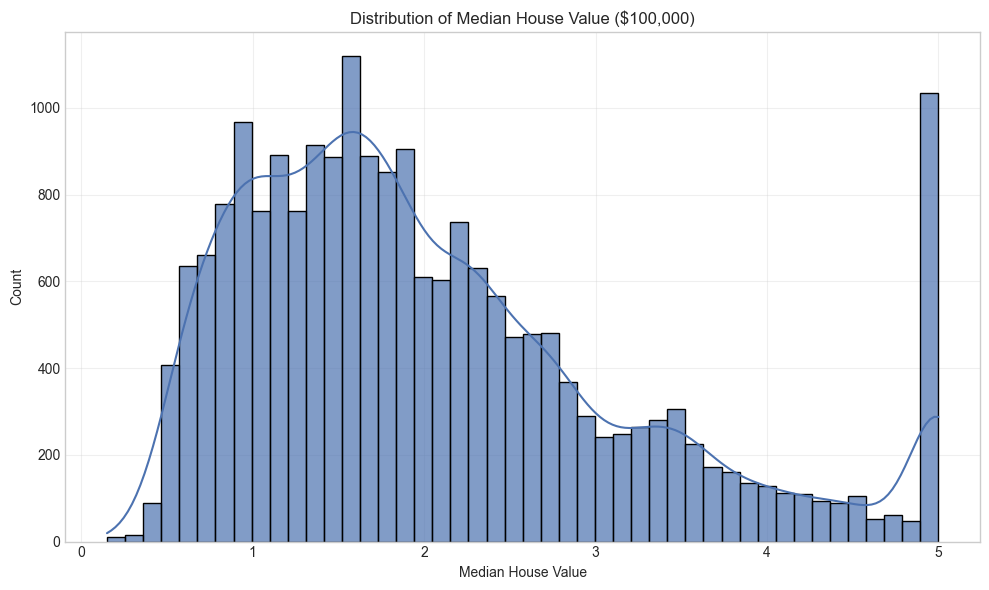

In [13]:
# Visualize the distribution of the target variable (Median House Value)
# The target variable represents the median house value for California districts, expressed in $100,000.

plt.figure(figsize=(10, 6))
sns.histplot(california_housing.target, kde=True, alpha=0.7)
plt.title('Distribution of Median House Value ($100,000)')
plt.xlabel('Median House Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Train/Validation/Test Split

To evaluate our model fairly, we split the data into:

- **Training set**: for fitting the model
- **Test set**: for final performance assessment

Furthermore we will do K-Fold Cross Validation.

In [14]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

# train-test split 80% train + validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=random_state
)

print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Train samples: 16512
Test samples: 4128


## 4. Feature Scaling

Feature scaling is a **preprocessing step** that adjusts the range or distribution of features. It ensures that no single feature dominates others due to its scale — especially important when features have different units (like income in dollars vs. number of rooms).


### 🚀 Why Scale Features?

1. **Balances Feature Influence**  
   Without scaling, features with larger values can overshadow others in model training.

2. **Improves Model Accuracy**  
   Algorithms like KNN or SVR depend on distances — scaling ensures those distances are meaningful.

3. **Faster Learning**  
   Scaled features help gradient-based algorithms (like linear regression or neural nets) converge faster.

4. **Fair Regularization**  
   Penalization methods like Lasso and Ridge assume features are on a similar scale.


### 📐 Two Common Scaling Methods

#### 1. `StandardScaler`  
Transforms features to **zero mean** and **unit variance**:  
$$
z = \frac{x - \mu}{\sigma}
$$  
✅ Great for algorithms that assume Gaussian-like data:
- Support Vector Machines (SVM)  
- Logistic Regression  
- Principal Component Analysis (PCA)

#### 2. `MinMaxScaler`  
Rescales data to a **fixed range**, usually [0, 1]:  
$$
x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
$$  
✅ Works well for distance-based models:
- K-Nearest Neighbors (KNN)  
- Neural Networks

### 📊 Why Scaling Helps Specific Models

#### Support Vector Regressor (SVR)
- Uses kernel functions to compute distances in high-dimensional space.  
- Large-scale features can skew the decision boundary.  
- ✅ **Scaling ensures equal weight across features.**

#### K-Nearest Neighbors (KNN)
- Relies on **Euclidean distance**.  
- Features with large values dominate the distance calculation.  
- ✅ **Scaling guarantees fair neighbor selection.**


### ✅ Summary

| Do Scale With   | When to Use                        |
|------------------|-------------------------------------|
| `StandardScaler` | SVM, Logistic Regression, PCA       |
| `MinMaxScaler`   | KNN, Neural Networks                |

🚫 **No scaling needed** for tree-based models like Decision Trees or Random Forests.


In [15]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fit on training, transform all sets
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

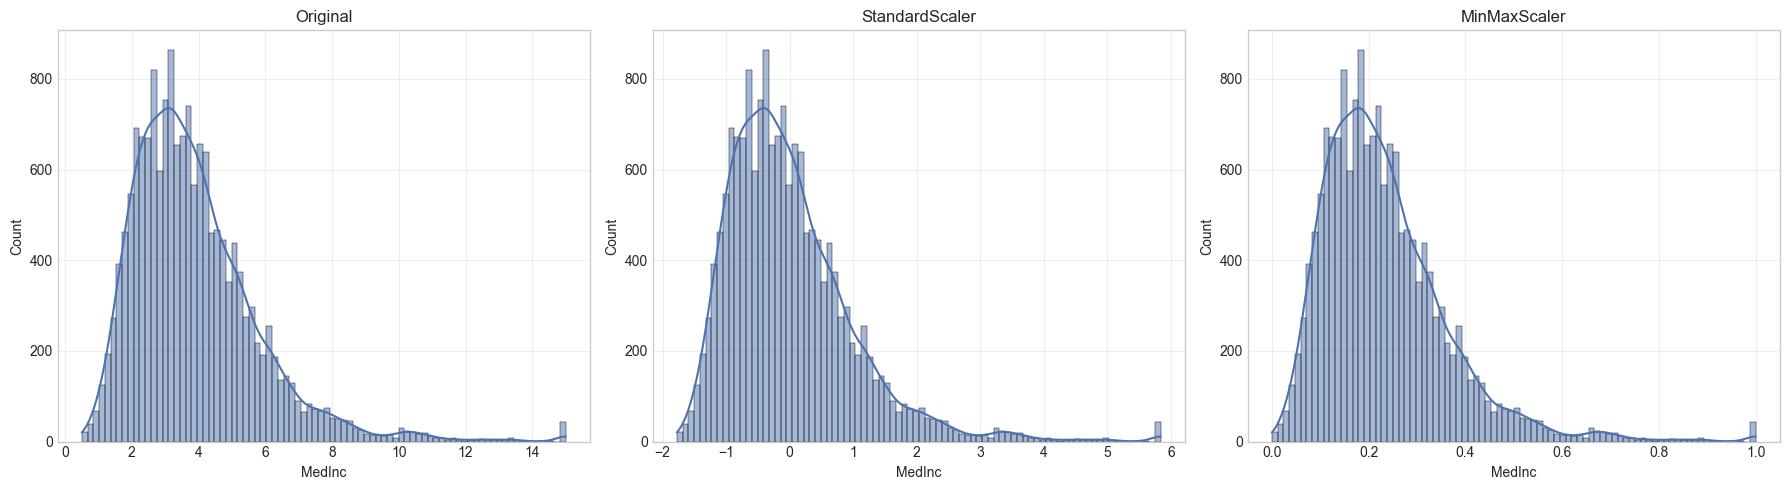

In [16]:
feature = 'MedInc'
feature_idx = california_housing.data.columns.get_loc(feature)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(X_train[feature], kde=True, ax=ax1)
ax1.set_title('Original')

sns.histplot(X_train_scaled[:, feature_idx], kde=True, ax=ax2)
ax2.set_title('StandardScaler')

sns.histplot(X_train_minmax[:, feature_idx], kde=True, ax=ax3)
ax3.set_title('MinMaxScaler')

for ax in (ax1, ax2, ax3):
    ax.grid(True, alpha=0.3)
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

## 5. Model Training and Loss Functions


We now train a variety of regression models and compare their performance. This includes:

- Linear Regression (ordinary least squares)
- Polynomial Regression (expanding features to degree-2 polynomial)
- Ridge and Lasso Regression (linear models with L2 and L1 regularization)
- Decision Tree Regressor and Random Forest Regressor (tree-based models)
- Support Vector Regressor (SVR) (kernel-based regression)

Regularization (Ridge/Lasso) adds a penalty to the linear model’s coefficients to discourage large weights, which can reduce overfitting

Ridge uses an L2 penalty (squares of weights), while Lasso uses an L1 penalty (absolute values)

The effect is that Lasso can drive some coefficients to zero (feature selection), while Ridge shrinks them uniformly

Below, we fit each model on the training set and evaluate on the validation set (later we will use the test set for final evaluation). We compare their performance using R², MSE, etc. For simplicity we use default hyperparameters:


### 5.1 Linear Regression

Linear regression is a supervised algorithm that learns to model a dependent variable, $y$, as a function of some independent variables (aka "features"), $x_i$, by finding a line (or surface) that best "fits" the data. In general, we assume $y$ to be some number and each $x_i$ can be basically anything. For example: predicting the price of a house using the number of rooms in that house ($y$: price,$x_1$ : number of rooms) or predicting weight from height and age ($y$: weight, $x_1$: height, $x_2$: age).

In general, the equation for linear regression is:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p + \epsilon$$

where:

- $y$: the dependent variable; the thing we are trying to predict.
- $x_i$: the independent variables: the features our model uses to model y.
- $\beta_i$: the coefficients (aka "weights") of our regression model. These are the foundations of our model. They are what our model "learns" during optimization.
- $\epsilon$: the irreducible error in our model. A term that collects together all the unmodeled parts of our data.

Fitting a linear regression model is all about finding the set of cofficients that best model $y$ as a function of our features. We may never know the true parameters for our model, but we can estimate them (more on this later). Once we've estimated these coefficients, $\hat \beta_i$, we predict future values, $\hat y$, as:

$$\hat y = \hat \beta_0 + \hat \beta_1x_1 + \hat \beta_2x_2 + ... + \hat \beta_px_p$$

So predicting future values (often called inference), is as simple as plugging the values of our features $x_i$ into our equation!


#### Loss Functions


In machine learning, we use performance-measuring functions called loss functions to quantify how good (or bad) our model performs. Several popular loss functions exist for regression problems, common ones are **MAE**, **MSE**, and **RMSE**.


**Mean Absolute Error (MAE):** the average of the absolute differences $\lvert y_{\text{true}} - y_{\text{pred}} \rvert$.

It measures the average magnitude of errors.

MAE is easy to interpret (e.g. MAE = 0.5 means on average the prediction is off by 0.5 units) and is robust to outliers (it does not square the error).

Use MAE when you want a straightforward average error and do not want to over-penalize large errors.


**Mean Squared Error (MSE):** the average of the squared differences $(y_{\text{true}} - y_{\text{pred}})^2$.

MSE quantifies how close a predicted value is to the true value, so we'll use it to quantify how close a regression line is to a set of points.

MSE works by squaring the distance between each data point and the regression line, summing the squared values, and then dividing by the number of data points:
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

The name is quite literal: take the mean of the squared errors. The squaring of errors prevents negative and positive terms from canceling out in the sum, and gives more weight to points further from the regression line, punishing outliers and larger errors are penalized more heavily.

In practice, we'll fit our regression model to a set training data, and evaluate it's performance using MSE on the test dataset.


**Root Mean Squared Error (RMSE):** the square root of **MSE**.

**RMSE** brings the error metric back to the original target units (since MSE is in squared units).

Like MSE, RMSE penalizes large errors but is often easier to interpret because it’s on the same scale as the data.

Typically RMSE ≥ MAE (with equality only if all errors are the same magnitude).


**R-Squared**

Regression models may also be evaluated with the so-called goodness of fit measures, which summarize how well a model fits a set of data. The most popular goodness of fit measure for linear regression is r-squared, a metric that represents the percentage of the variance in $y$ explained by our features $x$.

More specifically, r-squared measures the percentage of variance explained normalized against the baseline variance of our model (which is just the variance of the mean):

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y})^2}{\sum_{i=1}^{n} (y_i - \bar{y}_i)^2}$$
​
The highest possible value for r-squared is 1, representing a model that captures 100% of the variance. A negative r-squared means that our model is doing worse (capturing less variance) than a flat line through mean of our data would.


#### Gradient Descent

Gradient descent works as follows. We assume that we have some convex function representing the error of our machine learning algorithm (in our case, MSE). Gradient descent will iteratively update our model's coefficients in the direction of our error functions minimum .

For example, our model takes the form:
$$\hat y = \hat \beta_0 + \hat \beta_1x_1$$

and our error function takes the form:
$$\text{MSE}(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_1))^2$$

Our goal is to find the coefficients, $\beta_0$ and $\beta_1$, to minimize the error function. To do this, we'll use the gradient, which represents the direction that the function is increasing, and the rate at which it is increasing. Since we want to find the minimum of this function, we can go in the opposite direction of where it's increasing. This is exactly what Gradient Descent does, it works by taking steps in the direction opposite of where our error function is increasing, proportional to the rate of change. To find the coefficients that minimize the function, we first calculate the derivatives of our error function is increasing. To find the coefficients that minimize first, calculate the derivatives of our loss function, MSE:

$$
\frac{\partial}{\partial \beta_i} \text{MSE} =
\begin{cases}
-\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) & \text{for } i = 0 \\
-\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i) & \text{for } i = 1
\end{cases}
$$

Now that we have the gradients for our error function (with respect to each coefficient to be updated), we perform iterative updates:

$$
\text{repeat until convergence: } \{ \\
\beta_0 = \beta_0 - \alpha \left(-\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)\right) \\
\beta_1 = \beta_1 - \alpha \left(-\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i)\right) \\
\}
$$

Updating these values iteratively will yield coefficients of our model that minimize error.


#### Normal Equation

Normal Equation is a widely taught method for obtaining estimates for our linear regression coefficients.

The Normal Equation is a closed-form solution that allows us to estimate our coefficients directly by minimizing the residual sum of squares (RSS) of our data:

$$\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

The RSS should look familiar - it was a key piece in both the MSE and r-squared formulas that represents our model's total squared error:

$$\hat{\beta} = (X^T X)^{-1} X^T Y$$


#### Linear Regression with Normal Equation

In this section, we will utilize the normal equation method to train a linear regression model. This approach allows us to find the optimal coefficients without iterative methods.

The pipeline is set up with two key stages:

- **Feature Scaling**: To scale the features appropriately.
- **Linear Regression**: To perform regression on the transformed feature matrix.

Throughout this notebook, we will follow a consistent pattern for each estimator:

- **Pipeline**: Combines data preprocessing and modeling steps.
- **cross_validate**: Trains the model using `ShuffleSplit` cross-validation with `neg_mean_absolute_error` as the scoring metric.
- **Error Reporting**: Converts scores to errors and reports mean absolute errors on the development set.


In [ ]:
lin_reg_pipeline = Pipeline(
    [("feature_scaling", StandardScaler()), ("lin_reg", LinearRegression())]
)

lin_reg_cv_results = cross_validate(
    lin_reg_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
    cv=5,
)

# Print all metrics
lin_reg_res = summarize_metric("Linear Regression", lin_reg_cv_results)

# Append to the list of model performances
model_performances.append(lin_reg_res)

In [ ]:
y_pred = cross_val_predict(lin_reg_pipeline, X_train, y_train, cv=5, n_jobs=-1)

# Scatter: Predicted vs. True
plot_predicted_vs_actual(y_train, y_pred, "Linear Regression")

# Residuals: Error vs. Prediction
plot_residuals(y_train, y_pred, "Linear Regression")

#### Linear Regression with Stochastic Gradient Descent

In this section, we will employ the Stochastic Gradient Descent (SGD) method to train a linear regression model. This iterative optimization technique is particularly useful when dealing with large datasets.

The pipeline is configured with two essential stages:

- **Feature Scaling**: To standardize the features.
- **SGD Regression**: To perform regression using the transformed feature matrix.


In [ ]:
sgd_reg_pipeline = Pipeline(
    [
        ("feature_scaling", StandardScaler()),
        (
            "sgd_reg",
            SGDRegressor(
                max_iter=int(np.ceil(1e6 / X_train.shape[0])),
                early_stopping=True,
                eta0=1e-4,
                learning_rate="constant",
                random_state=random_state,
            ),
        ),
    ]
)

sgd_reg_cv_results = cross_validate(
    sgd_reg_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
    cv=5,
)

# Print all metrics
sgd_reg_res = summarize_metric("SGD Regression", lin_reg_cv_results)

# Append to the list of model performances
model_performances.append(sgd_reg_res)

### 5.2 Polynomial Regression

Polynomial regression is simply a linear regression on expanded features that include polynomial terms (e.g. $x^2$,$x^3$, etc.). In other words, we add new features like the square and cross-products of the original features. This allows fitting a curved (non-linear) relationship while still using a linear model under the hood.

For example, with `degree=2` we include all squared terms and interactions. We can implement this conveniently with scikit-learn’s `PolynomialFeatures` plus a `LinearRegression`. The model can capture quadratic curvature, but adding high-degree polynomials risks overfitting, so we keep degree small (e.g. 2).

In this segment, we will explore polynomial regression by training a model with a degree of 2. Additionally, we will use the `validation_curve` to determine the optimal degree for polynomial models.

The `PolynomialFeatures` function is employed to transform the features to the specified degree (in this case, 2). After transforming the features, we apply feature scaling before training the regression model.


In [ ]:
poly_reg_pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2)),
        ("feature_scaling", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ]
)

poly_reg_cv_results = cross_validate(
    poly_reg_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
    cv=5,
)

# Print all metrics
poly_res = summarize_metric("Polynomial Regression", poly_reg_cv_results)

#### Interaction features in Polynomial Regression

Upon examining the results, we observe that both the training and validation errors have decreased after utilizing second-order polynomial features in the model.

To optimize further, instead of employing all polynomial features, we focus on using only interaction feature terms in the polynomial model. This approach allows us to train a more efficient linear regression model.


In [ ]:
poly_reg_pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, interaction_only=True)),
        ("feature_scaling", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ]
)

poly_reg_cv_results = cross_validate(
    poly_reg_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
    cv=5,
)

# Print all metrics
poly_reg_res = summarize_metric("Polynomial Regression", poly_reg_cv_results)

# Append to the list of model performances
model_performances.append(poly_reg_res)

#### Choosing the right Polynominal Degree

To determine the most suitable polynomial degree for our regression problem, we will employ the `validation_curve`. This technique acts as a manual hyperparameter tuning method.

We will specify a list of polynomial degree values to explore, which will be passed as a parameter to the `validation_curve`. This allows us to identify the optimal degree that minimizes the error and improves the model's performance.


In [ ]:
degree = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(
    poly_reg_pipeline,
    X_train,
    y_train,
    param_name="poly__degree",
    param_range=degree,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
)

train_errors, test_errors = -train_scores, -test_scores
plt.plot(degree, train_errors.mean(axis=1), "b-x", label="Training error")
plt.plot(degree, test_errors.mean(axis=1), "r-x", label="Test error")
plt.legend()

plt.xlabel("degree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for polynomial regression")

#### Selecting the optimal Polynomial Degree

To identify the most effective polynomial degree, we focus on the degree that results in the lowest mean absolute error. In our analysis, a degree of 2 emerges as the optimal choice, as it yields the minimum mean absolute error. This degree will be selected for our polynomial regression model, ensuring a balance between model complexity and predictive accuracy.


### 5.3 Ridge Regression

Polynomial models, particularly those with higher-order features, are prone to overfitting. To mitigate this, we utilize Ridge regression, which incorporates a regularization term to penalize excessive model complexity.

Ridge regression is a regularized linear model that adds an L2 penalty on the coefficients. It solves $\min_w \lVert Xw - y \rVert^2 + \alpha \lVert w \rVert^2$, where $\alpha$ controls the shrinkage of coefficients.

The effect is to discourage large weights: features that are not strongly predictive get smaller coefficients. Ridge helps reduce overfitting, especially when features are highly correlated. It still learns a linear relationship, but with more stable (smaller) coefficients than ordinary linear regression when $\alpha \gt 0$.

For this analysis, we set the regularization rate `alpha` to **0.5** and train the regression model accordingly.

Subsequently, we will perform a hyperparameter search to determine the optimal value of `alpha` that minimizes cross-validation errors, ensuring an effective balance between model complexity and generalization.


In [ ]:
ridge_reg_pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, interaction_only=True)),
        ("feature_scaling", StandardScaler()),
        ("ridge", Ridge(alpha=0.5)),
    ]
)
ridge_reg_cv_results = cross_validate(
    ridge_reg_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
    cv=5,
)

# Print all metrics
ridge_res = summarize_metric("Rige Regression", ridge_reg_cv_results)

#### Ridge Hyperparameter tuning with `GridSeachCV`

To identify the optimal regularization strength for Ridge regression, we can use `GridSearchCV` for hyperparameter tuning.


In [ ]:
ridge_grid_pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, interaction_only=True)),
        ("feature_scaling", StandardScaler()),
        ("ridge", Ridge()),
    ]
)

param_grid = {"poly__degree": (1, 2, 3), "ridge__alpha": np.logspace(-4, 0, num=20)}

ridge_grid_search = GridSearchCV(
    ridge_grid_pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    scoring=scoring,
    return_train_score=True,
    cv=5,
    refit="r2",
)

ridge_grid_search.fit(X_train, y_train)

`ridge_grid_search.best_index_` gives us the index of the best parameter in the list


In [ ]:
# Print all metrics
ridge_reg_res = summarize_metric("Ridge Regression", ridge_grid_search, type="grid")

# Append to the list of model performances
model_performances.append(ridge_reg_res)

### 5.4 Lasso Regression


Lasso regression is another regularized linear model, using an L1 penalty.

The objective is $\min_w \frac{1}{2n} \lVert Xw - y \rVert^2 + \alpha \lVert w \rVert_1$. The L1 penalty encourages sparse coefficients, often setting some to exactly zero.

In practice, this means Lasso can perform feature selection: features with little predictive power can be dropped. Lasso is useful when you suspect only a few features matter. Like Ridge, it reduces overfitting, but it may zero out weak features entirely.

In this section, we will explore Lasso regression by setting up a baseline model with a fixed learning rate.


In [ ]:
lasso_reg_pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, interaction_only=True)),
        ("feature_scaling", StandardScaler()),
        ("lasso", Lasso(alpha=0.01)),
    ]
)
lasso_reg_cv_results = cross_validate(
    lasso_reg_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
    cv=5,
)

# Print all metrics
ridge_res = summarize_metric("Lasso Regression", lasso_reg_cv_results)

#### Lasso Hyperparameter tuning with `GridSeachCV`


In [ ]:
lasso_grid_pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(interaction_only=True)),
        ("feature_scaling", StandardScaler()),
        ("lasso", Lasso()),
    ]
)

param_grid = {"poly__degree": (1, 2, 3), "lasso__alpha": np.logspace(-4, 0, num=20)}

lasso_grid_search = GridSearchCV(
    lasso_grid_pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    scoring=scoring,
    return_train_score=True,
    cv=5,
    refit="r2",
)

lasso_grid_search.fit(X_train, y_train)

In [ ]:
# Print all metrics
lasso_reg_res = summarize_metric("Lasso Regression", lasso_grid_search, type="grid")

# Append to the list of model performances
model_performances.append(lasso_reg_res)

In [ ]:
print("The best parameter value is:", lasso_grid_search.best_params_)

### 5.4 Decision Tree Regressor


A decision tree for regression splits the data recursively by feature thresholds, partitioning the input space into regions and predicting the mean target in each leaf.

This model can capture highly non-linear relationships without any feature engineering: it simply finds the best splits to reduce variance. However, a deep tree can overfit the data (learning noise) easily. For example, a depth-5 tree in a toy regression may “memorize” noise, while a shallow tree (depth=2) captures only main trends.

In practice we control overfitting by limiting tree depth or using pruning. Decision trees naturally give feature importances (via impurity decrease), though they can be unstable.


In [ ]:
tree_reg_pipeline = Pipeline(
    [
        ("tree_reg", DecisionTreeRegressor(max_depth=5, random_state=random_state)),
    ]
)

tree_reg_pipeline_cv_results = cross_validate(
    tree_reg_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
    cv=5,
)

# Print all metrics
tree_reg_res = summarize_metric("Tree Regression", tree_reg_pipeline_cv_results)

# Append to the list of model performances
model_performances.append(tree_reg_res)

### 5.5 Random Forest Regressor


Random Forest is an ensemble of decision trees. It builds many trees on bootstrapped samples and averages their predictions. This reduces variance (overfitting) compared to a single tree, leading to better generalization.

Each tree is still non-linear, but averaging them smooths out the noise. Random forests can capture complex patterns and are often very accurate. They also provide feature importance measures (averaging the trees’ importances). However, they lose interpretability of single trees.


In [ ]:
forest_reg_pipeline = Pipeline(
    [
        (
            "forest_reg",
            RandomForestRegressor(n_estimators=100, random_state=random_state),
        ),
    ]
)

forest_reg_pipeline_cv_results = cross_validate(
    forest_reg_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
    cv=5,
)

# Print all metrics
forest_reg_res = summarize_metric(
    "Random Forest Regression", forest_reg_pipeline_cv_results
)

# Append to the list of model performances
model_performances.append(forest_reg_res)

### 5.6 Support Vector Regressor (SVR)


SVR adapts the idea of Support Vector Machines to regression. It tries to fit a function that deviates from the data by no more than a small margin $\epsilon$, focusing on points outside this margin.

By using kernel functions (e.g. radial basis function), SVR can model non-linear relationships. It is robust and can handle outliers (since small errors within $\epsilon$ are ignored).

However, SVR can be slow on large datasets and often requires feature scaling for good performance. In practice, we scale inputs (e.g. with StandardScaler) and then fit an RBF-kernel SVR.


In [ ]:
svr_reg_pipeline = Pipeline(
    [
        ("feature_scaling", StandardScaler()),
        ("svr_reg", SVR(kernel="rbf", C=10, epsilon=0.1)),
    ]
)

svr_reg_pipeline_cv_results = cross_validate(
    svr_reg_pipeline,
    X_train,
    y_train,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
    cv=5,
)

# Print all metrics
svr_reg_res = summarize_metric("SVR Regression", svr_reg_pipeline_cv_results)

# Append to the list of model performances
model_performances.append(svr_reg_res)

## 6. Error Analysis


In [ ]:
performance_df = pd.DataFrame(model_performances).sort_values(
    by="val_R2", ascending=False
)

# Plot comparison of models
plt.figure(figsize=(14, 10))

# RMSE Comparison
plt.subplot(2, 1, 1)
plt.barh(performance_df["model_name"], performance_df["val_MSE"], color="skyblue")
plt.title("Validation MSE by Model (Lower is Better)", fontsize=14)
plt.xlabel("MSE", fontsize=12)
plt.grid(True, alpha=0.3)

# R² Comparison
plt.subplot(2, 1, 2)
plt.barh(performance_df["model_name"], performance_df["val_R2"], color="lightgreen")
plt.title("Validation R² by Model (Higher is Better)", fontsize=14)
plt.xlabel("R² Score", fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Select the best model based on validation R² score
best_model_name = performance_df.iloc[0]["model_name"]
print(f"\nBest performing model based on validation R² score: {best_model_name}")

To visualize error patterns, we use plots

A Predicted vs Actual scatter plot shows each test point with true value on one axis and the model’s prediction on the other. In an ideal model, all points would lie on the diagonal $y_{pred} = y_{true}$.

In practice, we look for a tight cluster around this line. A strong correlation (points tightly around the diagonal) indicates good performance, while a diffuse cloud or systematic gap from the line indicates poor predictions.

This plot is particularly insightful when there is just one explanatory variable, but it generalizes to any regression.


In [ ]:
y_pred = cross_val_predict(forest_reg_pipeline, X_train, y_train, cv=5, n_jobs=-1)

In [ ]:
# Scatter: Predicted vs. Actual
plot_predicted_vs_actual(y_train, y_pred, "Random Forest Regression")

The residuals (actual – predicted) reveal deeper patterns.

A Residual vs Predicted plot displays each point’s residual on the vertical axis and the predicted value on the horizontal axis. Ideally, residuals should be randomly scattered around zero.


In [ ]:
# Residuals: Error vs. Prediction
plot_residuals(y_train, y_pred, "Random Forest Regression")

We can also plot a histogram (or KDE) of the residuals.

Ideally, this histogram is centered at 0 and roughly symmetric, indicating errors are unbiased and roughly normal. If the residual histogram is skewed or has heavy tails, it suggests systematic errors (or outliers).

For example, if residuals are mostly positive, the model tends to underpredict; if mostly negative, it overpredicts. In a good model, the mean of residuals is near zero and their spread is as small as possible.


In [ ]:
residuals = y_train - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residual (Actual − Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()

## 7. Model Evaluation and Diagnostics


Finally, we evaluate our chosen model on the test set using the above metrics and plots.

For example, we might compute the R² score and error metrics for Random Forest:


In [ ]:
# Fit the pipeline to all of your training data
forest_reg_pipeline.fit(X_train, y_train)

# Make predictions on X_test
y_pred = forest_reg_pipeline.predict(X_test)

In [ ]:
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [ ]:
print("Random Forest R²:", r2_test)
print("Random Forest MAE:", mae_test)
print("Random Forest MSE:", mse_test)

A higher R² (closer to 1) indicates better predictive power.

We typically expect the Random Forest to perform better (higher R², lower errors) than a simple linear model on this complex dataset.


In [ ]:
# Scatter: Predicted vs. Actual
plot_predicted_vs_actual(y_test, y_pred, "Random Forest Regression")

In [ ]:
# Residuals: Error vs. Prediction
plot_residuals(y_test, y_pred, "Random Forest Regression")

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residual (Actual − Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()